In [1]:
# Importing required libraries for the analysis of tabular data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time
from sklearn import metrics
# Data set
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
# Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
# Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# Plotting
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import plotly.express as px

# Black box explainers
import shap
import lime
from lime import lime_tabular

# Saving
from joblib import dump
# To use the existing model
from joblib import load

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


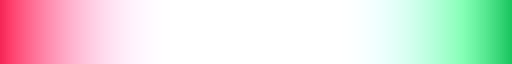

In [2]:
# here I decided to use the same color scheme as for the imagery case
from matplotlib.colors import LinearSegmentedColormap
colors = []
count1=0
count2=100
for l in np.linspace(1,0,100):
	colors.append((245/255+0.008*count1,39/255+0.008*count1,87/255+0.008*count1,l))
	count1+=1
for l in np.linspace(0,0,100):
	colors.append((230/255,230/255,230/255,l))
for l in np.linspace(0,1,100):
	colors.append((24/255+0.008*count2,196/255+0.008*count2,93/255+0.008*count2,l))
	count2-=1
cm = LinearSegmentedColormap.from_list("shap", colors)
cm

In [3]:
################################################################################################################################################################

In [4]:
# Clustering

In [5]:
# Getting data
data = load_breast_cancer()
# Date processing stage
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Model initializing
rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=100)
rf_classifier.fit(X_train, y_train)
random_forest_preds_classifier = rf_classifier.predict(X_test)
# Model's quality
print('The accuracy of the Random Forest classifier is :\t',metrics.accuracy_score(random_forest_preds_classifier,y_test))
print('The precision of the Random Forest classifier is :\t',metrics.precision_score(random_forest_preds_classifier,y_test))
print('The recall of the Random Forest classifier is :\t',metrics.recall_score(random_forest_preds_classifier,y_test))
print('The F1 score of the Random Forest classifier is :\t',metrics.f1_score(random_forest_preds_classifier,y_test))

The accuracy of the Random Forest classifier is :	 0.9649122807017544
The precision of the Random Forest classifier is :	 0.9859154929577465
The recall of the Random Forest classifier is :	 0.958904109589041
The F1 score of the Random Forest classifier is :	 0.9722222222222222


In [6]:
dump(rf_classifier, 'random_forest_classifier.joblib')
# or using the existing model
#rf_classifier = load('my_path/Thesis/Models/random_forest_classifier.joblib')

['random_forest_classifier.joblib']

In [7]:
rf_classifier.predict_proba(X_test)

array([[0.034, 0.966],
       [0.997, 0.003],
       [0.995, 0.005],
       [0.   , 1.   ],
       [0.001, 0.999],
       [1.   , 0.   ],
       [0.998, 0.002],
       [0.908, 0.092],
       [0.695, 0.305],
       [0.029, 0.971],
       [0.069, 0.931],
       [0.984, 0.016],
       [0.093, 0.907],
       [0.839, 0.161],
       [0.017, 0.983],
       [0.986, 0.014],
       [0.053, 0.947],
       [0.004, 0.996],
       [0.001, 0.999],
       [0.999, 0.001],
       [0.173, 0.827],
       [0.002, 0.998],
       [1.   , 0.   ],
       [0.004, 0.996],
       [0.003, 0.997],
       [0.075, 0.925],
       [0.009, 0.991],
       [0.061, 0.939],
       [0.   , 1.   ],
       [0.999, 0.001],
       [0.012, 0.988],
       [0.   , 1.   ],
       [0.168, 0.832],
       [0.053, 0.947],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.706, 0.294],
       [0.057, 0.943],
       [0.999, 0.001],
       [0.099, 0.901],
       [0.   , 1.   ],
       [0.985, 0.015],
       [0.005, 0.995],
       [0.0

In [8]:
# Calculate Shap values
explainer_raw = shap.TreeExplainer(rf_classifier)
shap_values = explainer_raw(X_train)
# force plot of first row for class 1
class_idx = 1
row_idx = 0
expected_value = explainer_raw.expected_value[class_idx]
shap_value = shap_values[:, :, class_idx].values[row_idx]
explainer = shap.TreeExplainer(rf_classifier)
choosen_instance = X_test.iloc[[1]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
output_of_force_plot_0 = shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance, matplotlib=0, plot_cmap=["#18c45d", "#f52757"])

In [9]:
file ='force_plot_classifier_0.html'
shap.save_html(file, output_of_force_plot_0)

In [10]:
# Calculate Shap values
explainer_raw = shap.TreeExplainer(rf_classifier)
shap_values = explainer_raw(X_train)
# force plot of first row for class 1
class_idx = 1
row_idx = 0
expected_value = explainer_raw.expected_value[class_idx]
shap_value = shap_values[:, :, class_idx].values[row_idx]
explainer = shap.TreeExplainer(rf_classifier)
choosen_instance = X_test.iloc[[0]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
output_of_force_plot_1 = shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance, matplotlib=0, plot_cmap=["#18c45d", "#f52757"])

In [11]:
file ='force_plot_classifier_1.html'
shap.save_html(file, output_of_force_plot_1)

In [12]:
newdf = pd.concat([X,pd.DataFrame(y)],axis=1)
np.mean(newdf.loc[(newdf[0] == 1)]["worst concavity"])

0.16623772268907563

In [13]:
np.mean(X["worst area"])

880.5831282952548

In [14]:
np.mean(X["worst concave points"])

0.11460622319859401

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


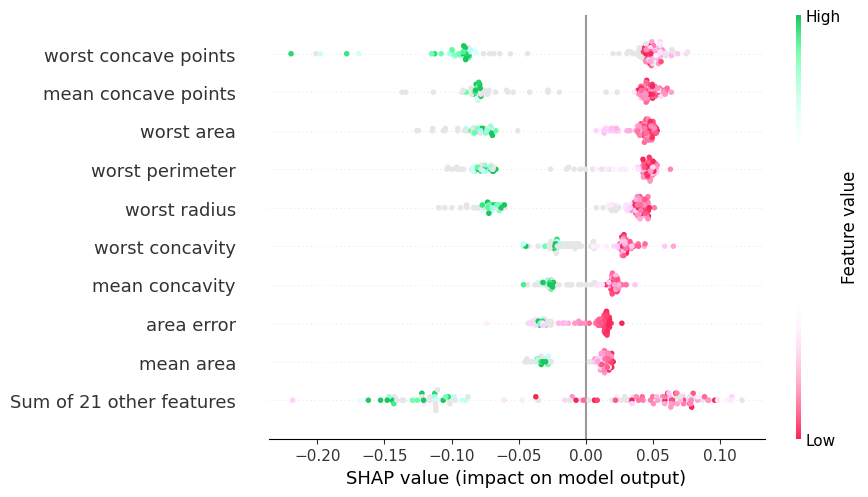

In [15]:
shap_values = explainer_raw(X_test)
tmp = shap.Explanation(shap_values[:, :, 1], data=X_test, feature_names=X_test.columns)
shap.plots.beeswarm(tmp, color=cm)

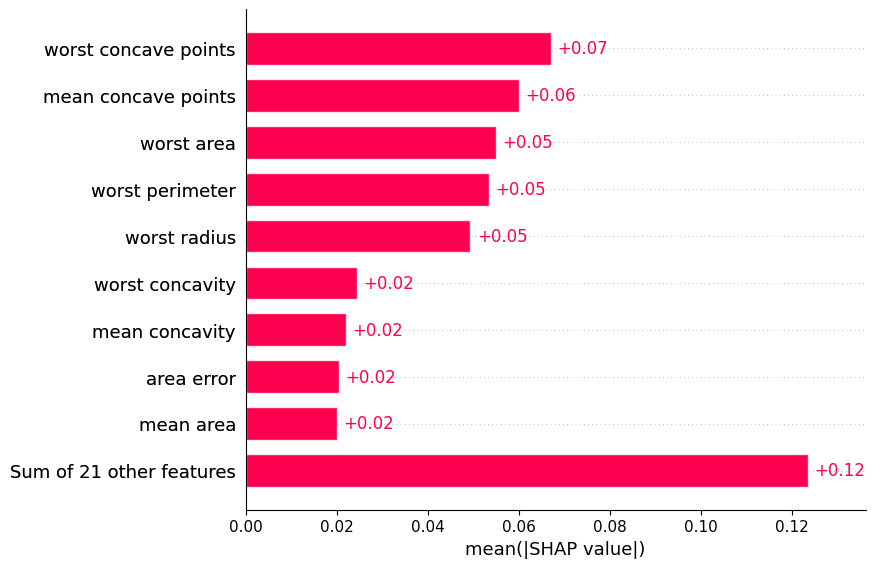

In [16]:
shap.plots.bar(shap_values[:,:,0], max_display=10, order=shap.Explanation.argsort.flip)

In [17]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), verbose=True, mode='classification')
j = 1
exp = explainer.explain_instance(X_test.iloc[j], rf_classifier.predict_proba, num_features=10)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.7540630176133203
Prediction_local [0.03372718]
Right: 0.003


In [18]:
exp.save_to_file('output_classifier_lime_malignant.html')

In [19]:
# Show the predictions
exp.show_in_notebook(show_table=0)

In [20]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), verbose=True, mode='classification')
j = 0
exp = explainer.explain_instance(X_test.iloc[j], rf_classifier.predict_proba, num_features=10)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.5228158241513619
Prediction_local [0.73304845]
Right: 0.966


In [21]:
exp.save_to_file('output_classifier_lime_benign.html')

In [22]:
# Show the predictions
exp.show_in_notebook(show_table=0)

The accuracy of the Decision Tree clssifier is :	 0.9298245614035088
The precision of the Decision Tree clssifier is :	 0.9295774647887324
The recall of the Decision Tree classifier is :	 0.9565217391304348
The F1 score of the Decision Tree classifier is :	 0.9428571428571428


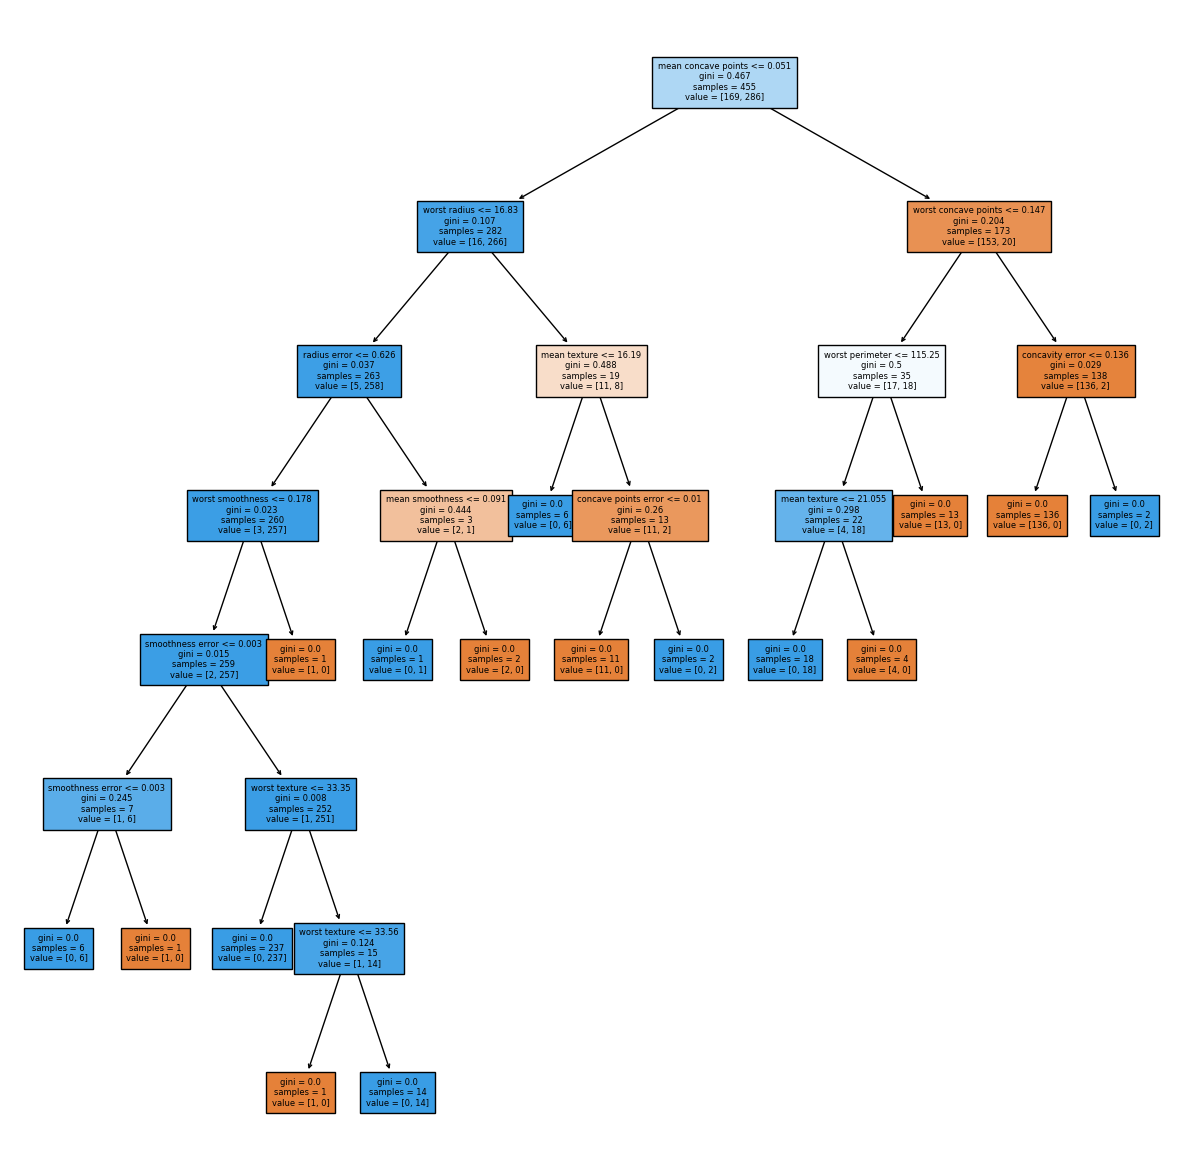

In [23]:
clf = DecisionTreeClassifier(max_depth=100)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
decision_tree_preds_classifier = clf.predict(X_test)
print('The accuracy of the Decision Tree clssifier is :\t',metrics.accuracy_score(decision_tree_preds_classifier,y_test))
print('The precision of the Decision Tree clssifier is :\t',metrics.precision_score(decision_tree_preds_classifier,y_test))
print('The recall of the Decision Tree classifier is :\t',metrics.recall_score(decision_tree_preds_classifier,y_test))
print('The F1 score of the Decision Tree classifier is :\t',metrics.f1_score(decision_tree_preds_classifier,y_test))

plt.figure(figsize=(15,15))  # set plot size (denoted in inches)
plot_tree(clf, filled=True, feature_names=list(X_test.columns),fontsize=6)
plt.show()

In [24]:
dump(decision_tree_preds_classifier, 'tree_classifier.joblib')
#decision_tree_preds_classifier = load('my_path/Thesis/Models/tree_classifier.joblib')

['tree_classifier.joblib']

In [25]:
################################################################################################################################################################

In [26]:
# Regression

In [27]:
# Getting data
california = fetch_california_housing()
# Date processing stage
california_X = pd.DataFrame(california['data'])
california_X.columns = california.feature_names
X_train, X_test, y_train, y_test = train_test_split(california_X,
                                                    california['target'], random_state=42)
# Model initializing
rf_regr = RandomForestRegressor(n_estimators=1000, max_depth=10)
rf_regr.fit(X_train, y_train)
random_forest_preds_regression = rf_regr.predict(X_test)
# Model's quality
print('The MSE of the Random Forest resgression is :\t',metrics.mean_squared_error(random_forest_preds_regression,y_test))
print('The RMSE of the Random Forest resgression is :\t',(metrics.mean_squared_error(random_forest_preds_regression,y_test))**0.5)
print('The MAPE of the Random Forest resgression is :\t',metrics.mean_absolute_percentage_error(random_forest_preds_regression,y_test))
print('The MAE of the Random Forest resgression is :\t',metrics.mean_absolute_error(random_forest_preds_regression,y_test))

The MSE of the Random Forest resgression is :	 0.2907920913190029
The RMSE of the Random Forest resgression is :	 0.539251417540096
The MAPE of the Random Forest resgression is :	 0.1853312134351713
The MAE of the Random Forest resgression is :	 0.36411437124448864


In [28]:
dump(rf_regr, 'random_forest_regression.joblib')
#rf_regr = load('my_path/Thesis/Models/random_forest_regression.joblib')

['random_forest_regression.joblib']

<Axes: xlabel='MedHouseVal', ylabel='MedHouseVal predicted'>

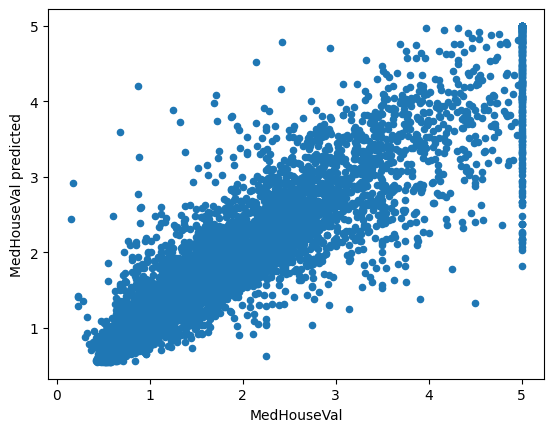

In [29]:
df = pd.DataFrame({'MedHouseVal':y_test, 'MedHouseVal predicted':random_forest_preds_regression})
df.plot('MedHouseVal', 'MedHouseVal predicted', kind='scatter')

In [30]:
fig = px.scatter(df, x="MedHouseVal", y="MedHouseVal predicted",
                 width=1000, height=1000)

fig.update_layout(
    font=dict(size=25),
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [31]:
explainer = shap.TreeExplainer(rf_regr)
shap_values = explainer.shap_values(X_test.iloc[3, :])
output_of_force_plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[3, :], matplotlib=False, plot_cmap=["#18c45d", "#f52757"])

In [32]:
np.mean(california['target'])

2.068558169089147

In [33]:
file ='force_plot_regressor.html'
shap.save_html(file, output_of_force_plot)

In [34]:
explainer = shap.TreeExplainer(rf_regr)
shap_values = explainer(X_test)

/Users/artemsmirnov/Library/Python/3.9/lib/python/site-packages/shap/plots/_beeswarm.py:375: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



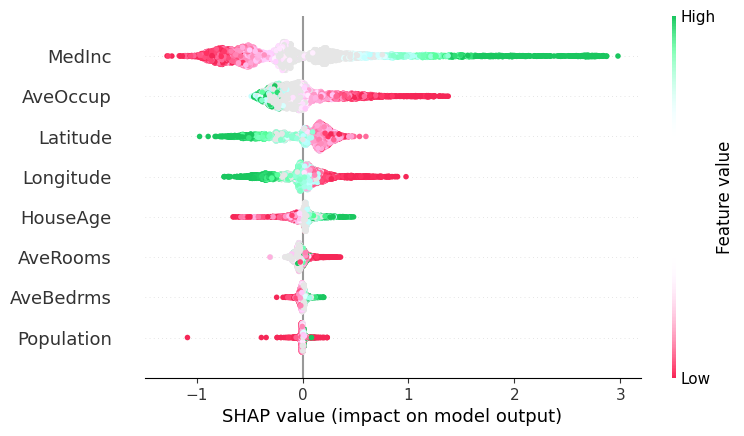

In [35]:
shap.plots.beeswarm(shap_values, color=cm)

In [36]:
fig = px.scatter(X_test, x="Longitude", y="Latitude", color=list(y_test), size=list(y_test),
                 width=1000, height=1000, color_continuous_scale=["#f52757", "#e6e6e6", "#18c45d"])

fig.update_layout(
    title="Real housing prices (size and color)",
    font=dict(size=25),
    margin=dict(l=20, r=20, t=100, b=20),
    paper_bgcolor="LightSteelBlue"
)

fig.show()

In [37]:
SHAP_latitude = []
for i in range(0,len(X_test)):
    SHAP_latitude.append(shap_values.values[i][6])
SHAP_longitude = []
for i in range(0,len(X_test)):
    SHAP_longitude.append(shap_values.values[i][7])

In [38]:
X_test["SHAP_latitude"] = SHAP_latitude
X_test["SHAP_longitude"] = SHAP_longitude

In [39]:
fig = px.scatter(X_test, x="Longitude", y="Latitude", color=list(X_test["SHAP_longitude"]), size=random_forest_preds_regression,
                 width=1000, height=1000, color_continuous_scale=["#f52757", "#e6e6e6", "#18c45d"])

fig.update_layout(
    title="Predicted prices (size), SHAP for longitude (color)",
    font=dict(size=25),
    margin=dict(l=20, r=20, t=100, b=20),
    paper_bgcolor="LightSteelBlue"
)

fig.show()

In [40]:
fig = px.scatter(X_test, x="Longitude", y="Latitude", color=list(X_test["SHAP_latitude"]), size=random_forest_preds_regression,
                 width=1000, height=1000, color_continuous_scale=["#f52757", "#e6e6e6", "#18c45d"])

fig.update_layout(
    title="Predicted prices (size), SHAP for latitude (color)",
    font=dict(size=25),
    margin=dict(l=20, r=20, t=100, b=20),
    paper_bgcolor="LightSteelBlue"
)

fig.show()

In [41]:
X_test = X_test.drop(["SHAP_latitude"], axis=1)
X_test = X_test.drop(["SHAP_longitude"], axis=1)

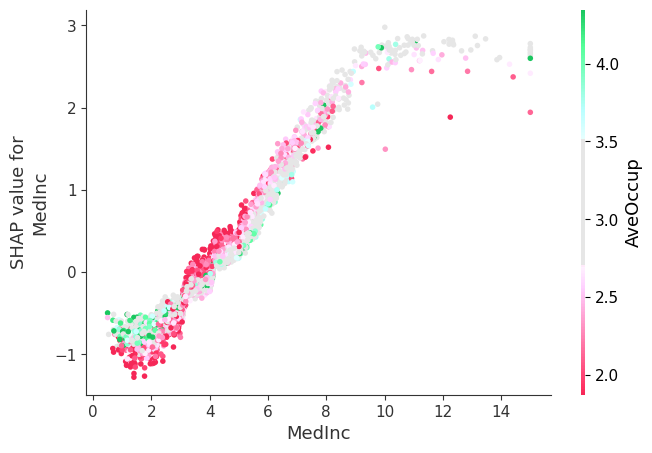

In [42]:
shap.dependence_plot("MedInc", shap_values.values, X_test, interaction_index="AveOccup", cmap=cm)

In [43]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), verbose=True, mode='regression')
j = 3
exp = explainer.explain_instance(X_test.values[j], rf_regr.predict, num_features=10)

/Users/artemsmirnov/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Intercept 1.9756226729447595
Prediction_local [3.13292736]
Right: 2.4578609561431013


In [44]:
exp.save_to_file('output_regressor_lime.html')

In [45]:
# Show the predictions
exp.show_in_notebook(show_table=0)

The MSE of the Decision Tree resgression is :	 0.41834769454342435
The RMSE of the Decision Tree resgression is :	 0.6467980322661969
The MAPE of the Decision Tree resgression is :	 0.2254281166087855
The MAE of the Decision Tree resgression is :	 0.4330337333874766


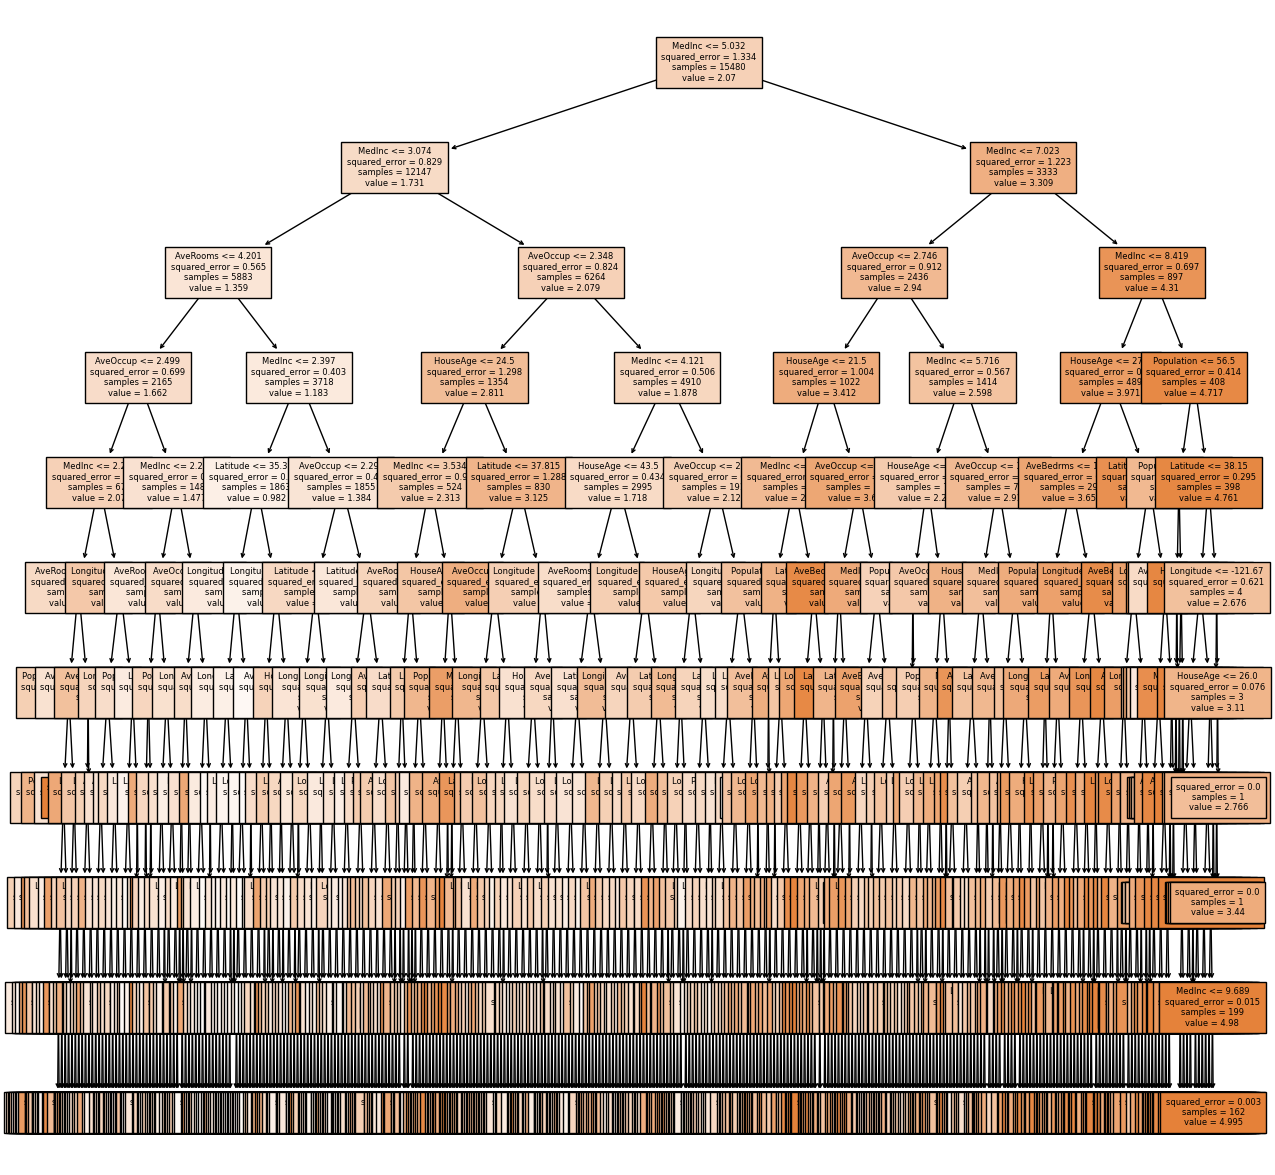

In [46]:
rgr = DecisionTreeRegressor(max_depth=10, max_features=None)
# Train Decision Tree Regressor
rgr = rgr.fit(X_train,y_train)
#Predict the response for test dataset
decision_tree_preds_regression = rgr.predict(X_test)
# Model's quality
print('The MSE of the Decision Tree resgression is :\t',metrics.mean_squared_error(decision_tree_preds_regression,y_test))
print('The RMSE of the Decision Tree resgression is :\t',(metrics.mean_squared_error(decision_tree_preds_regression,y_test))**0.5)
print('The MAPE of the Decision Tree resgression is :\t',metrics.mean_absolute_percentage_error(decision_tree_preds_regression,y_test))
print('The MAE of the Decision Tree resgression is :\t',metrics.mean_absolute_error(decision_tree_preds_regression,y_test))
plt.figure(figsize=(15,15))  # set plot size (denoted in inches)
plot_tree(rgr, filled=True, feature_names=list(X_test.columns),fontsize=6)
plt.show()

In [47]:
dump(decision_tree_preds_regression, 'tree_regression.joblib')
#decision_tree_preds_regression = load('my_path/Thesis/Models/tree_regression.joblib')

['tree_regression.joblib']